# Breast Cancer Prognosis data notebook

## Required imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as spp
import sklearn.manifold as smf
from sklearn.feature_selection import SelectKBest

## Prepare the dataset

### Read the dataset

In [21]:
wpbc_dataframe = pd.read_csv(
    '../dataset/wpbc_original.csv', 
    delimiter=',',
    header=0
)

### Display the dataset

In [22]:
display(
    wpbc_dataframe.head(),
    wpbc_dataframe.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    198 non-null    int64  
 1   OUTCOME               198 non-null    object 
 2   RADIUS_1              198 non-null    float64
 3   TEXTURE_1             198 non-null    float64
 4   PERIMETER_1           198 non-null    float64
 5   AREA_1                198 non-null    float64
 6   SMOOTHNESS_1          198 non-null    float64
 7   COMPACTNESS_1         198 non-null    float64
 8   CONCAVITY_1           198 non-null    float64
 9   CONCAVE_POINTS_1      198 non-null    float64
 10  SYMMETRY_1            198 non-null    float64
 11  FRACTAL_DIMENSIONS_1  198 non-null    float64
 12  RADIUS_2              198 non-null    float64
 13  TEXTURE_2             198 non-null    float64
 14  PERIMETER_2           198 non-null    float64
 15  AREA_2                1

,ID,OUTCOME,RADIUS_1,TEXTURE_1,PERIMETER_1,AREA_1,SMOOTHNESS_1,COMPACTNESS_1,CONCAVITY_1,CONCAVE_POINTS_1,SYMMETRY_1,FRACTAL_DIMENSIONS_1,RADIUS_2,TEXTURE_2,PERIMETER_2,AREA_2,SMOOTHNESS_2,COMPACTNESS_2,CONCAVITY_2,CONCAVE_POINTS_2,SYMMETRY_2,FRACTAL_DIMENSIONS_2,RADIUS_3,TEXTURE_3,PERIMETER_3,AREA_3,SMOOTHNESS_3,COMPACTNESS_3,CONCAVITY_3,CONCAVE_POINTS_3,SYMMETRY_3,FRACTAL_DIMENSIONS_3,TUMOR_SIZE,LYMPH_NODE_STATUS
0,119513,N,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


None

### Encode categorical Outcome data to numeric

In [23]:
encoder = spp.LabelEncoder()
wpbc_dataframe['OUTCOME'] = encoder.fit_transform(y=wpbc_dataframe['OUTCOME'])

### Replace NaN values

In [24]:
wpbc_dataframe = wpbc_dataframe.replace(
    to_replace='?',
    value=0
)
wpbc_dataframe['LYMPH_NODE_STATUS'] = wpbc_dataframe['LYMPH_NODE_STATUS'].astype(dtype=np.float64)
wpbc_dataframe = wpbc_dataframe.replace(
    to_replace='?',
    value=wpbc_dataframe['LYMPH_NODE_STATUS'].mean()
)

### Separate ID's, Features, Outcomes

In [25]:
wpbc_ids = wpbc_dataframe.loc[:,'ID']
wpbc_outcomes = wpbc_dataframe.loc[:,'OUTCOME']
wpbc_features = wpbc_dataframe.iloc[:,2:]

display(
    wpbc_ids,
    wpbc_outcomes,
    wpbc_features
)

0      119513
1        8423
2      842517
3      843483
4      843584
        ...  
193    942640
194    943471
195     94547
196    947204
197    947489
Name: ID, Length: 198, dtype: int64

0      0
1      0
2      0
3      0
4      1
      ..
193    0
194    0
195    0
196    1
197    0
Name: OUTCOME, Length: 198, dtype: int64

,RADIUS_1,TEXTURE_1,PERIMETER_1,AREA_1,SMOOTHNESS_1,COMPACTNESS_1,CONCAVITY_1,CONCAVE_POINTS_1,SYMMETRY_1,FRACTAL_DIMENSIONS_1,RADIUS_2,TEXTURE_2,PERIMETER_2,AREA_2,SMOOTHNESS_2,COMPACTNESS_2,CONCAVITY_2,CONCAVE_POINTS_2,SYMMETRY_2,FRACTAL_DIMENSIONS_2,RADIUS_3,TEXTURE_3,PERIMETER_3,AREA_3,SMOOTHNESS_3,COMPACTNESS_3,CONCAVITY_3,CONCAVE_POINTS_3,SYMMETRY_3,FRACTAL_DIMENSIONS_3,TUMOR_SIZE,LYMPH_NODE_STATUS
0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.00000
1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.00000
2,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.00000
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.00000
194,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.00000
195,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.00000
196,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3.21134


### Select K best features

In [26]:
selector = SelectKBest(k=10)
best_features = selector.fit(wpbc_features, wpbc_outcomes)
print(wpbc_features.columns[best_features.get_support()])

Index(['RADIUS_1', 'PERIMETER_1', 'AREA_1', 'PERIMETER_2', 'AREA_2',
       'RADIUS_3', 'PERIMETER_3', 'AREA_3', 'TUMOR_SIZE', 'LYMPH_NODE_STATUS'],
      dtype='object')


## Correlation matrix


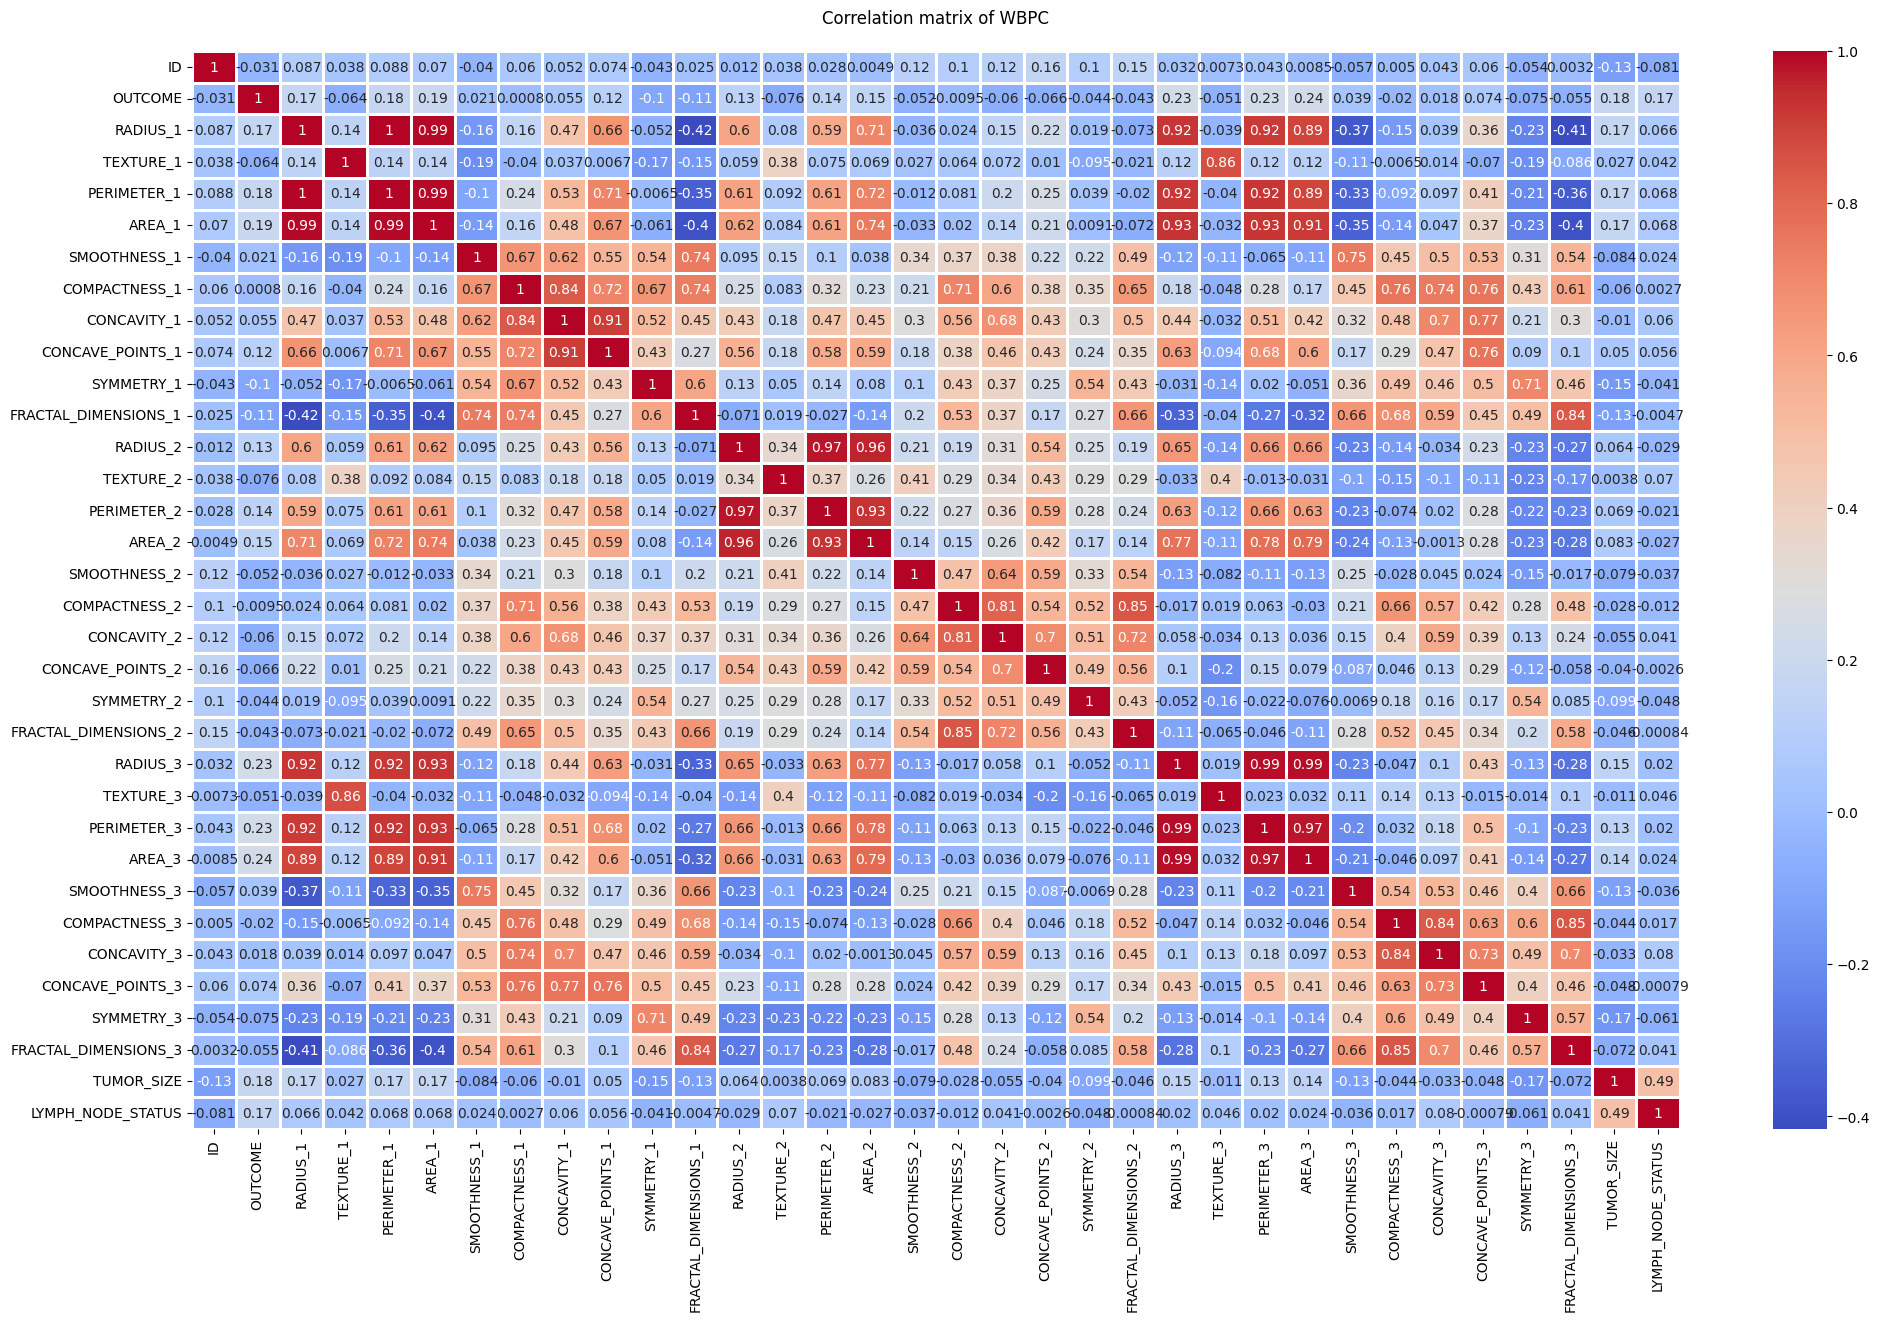

In [27]:
correlation_matrix = wpbc_dataframe.corr()
plt.figure(figsize=(24,14))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=1, annot=True)
plt.title('Correlation matrix of WBPC', pad=20)
plt.show()

## Visualization of chosen highly-correlated features

<Figure size 500x500 with 0 Axes>

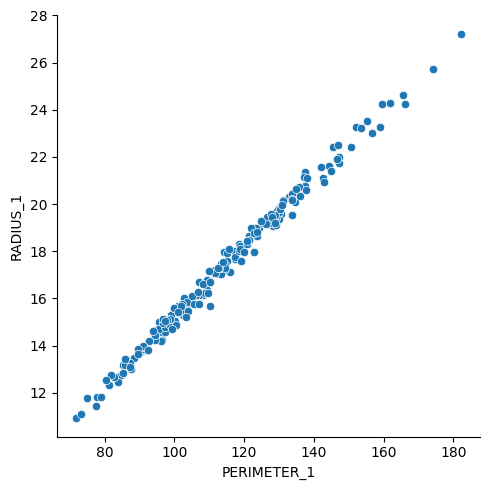

In [28]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.relplot(
    x=wpbc_features.loc[:,'PERIMETER_1'],
    y=wpbc_features.loc[:,'RADIUS_1']
)
plt.show()

<Figure size 500x500 with 0 Axes>

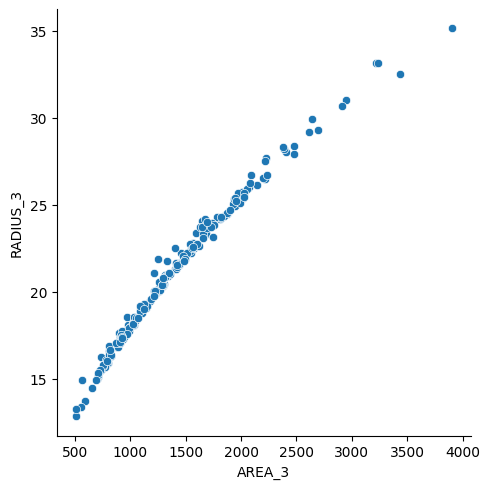

In [29]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.relplot(
    x=wpbc_features.loc[:,'AREA_3'],
    y=wpbc_features.loc[:,'RADIUS_3']
)
plt.show()

<Figure size 500x500 with 0 Axes>

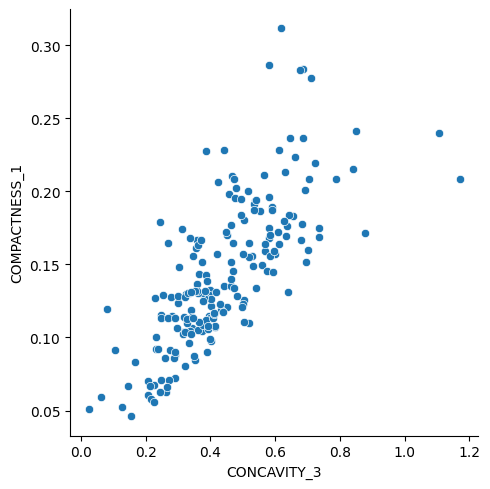

In [30]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.relplot(
    x=wpbc_features.loc[:,'CONCAVITY_3'],
    y=wpbc_features.loc[:,'COMPACTNESS_1']
)
plt.show()

## Dimension reduction

In [31]:
reduced_dataframes = []
for num in range(5, 20, 5):
    tsne = smf.TSNE(
        n_components=num,
        method='exact'
    )
    wpbc_features_reduced = tsne.fit_transform(
        X=wpbc_features
    )
    reduced_dataframes.append(pd.DataFrame(data=wpbc_features_reduced))

## Merge reduced features with ID's & Labels

In [32]:
id_outcome_dataframe = pd.merge(
    left=wpbc_ids,
    right=wpbc_outcomes,
    left_index=True,
    right_index=True
)

pd.merge(
    left=id_outcome_dataframe,
    right=reduced_dataframes[0],
    left_index=True,
    right_index=True
)

,ID,OUTCOME,0,1,2,3,4
0,119513,0,1.854642,0.644301,0.324563,0.461302,0.381907
1,8423,0,7.178514,1.192312,-0.521426,-1.370558,-0.033595
2,842517,0,7.757835,-0.701265,-0.205780,-0.696136,-0.118450
3,843483,0,-10.199066,1.673893,0.339819,0.748501,-0.124541
4,843584,1,4.757602,-1.125906,0.484918,0.733060,0.261431
...,...,...,...,...,...,...,...
193,942640,0,8.232930,-1.119516,-0.236931,0.348492,-0.310686
194,943471,0,-5.816495,-1.523294,0.042785,0.363560,-0.076890
195,94547,0,-0.340115,0.372996,0.091120,0.383669,0.008964
196,947204,1,9.195660,0.553836,-0.839728,-0.195956,-0.483043


## Visualization of reduced datasets

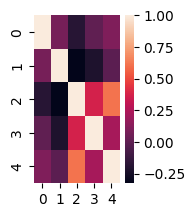

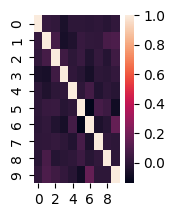

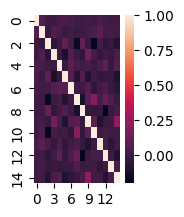

In [33]:
for reduced_dataframe in reduced_dataframes:
    plt.subplot(245)
    sns.heatmap(
        data=reduced_dataframe.corr()
    )
    plt.show()